# Autoencoder

### Installs dependencies

In [1]:
# Install dependencies
%pip install torch
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install scikit-learn
%pip install seaborn


[notice] A new release of pip is available: 24.3 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.3 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.3 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.3 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.3 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.3 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note

### Import dependencies

In [2]:
# Import all required libraries

import os
import torch
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler, MinMaxScaler

## Training the model

### Load and set up data sources

In [3]:
# Load all required data for training

# Load csv file
df_25 = pd.read_csv('../../data/care_to_compare/Wind Farm A/datasets/25.csv', delimiter=';')
df_13 = pd.read_csv('../../data/care_to_compare/Wind Farm A/datasets/13.csv', delimiter=';')
df_24 = pd.read_csv('../../data/care_to_compare/Wind Farm A/datasets/24.csv', delimiter=';')
df_3 = pd.read_csv('../../data/care_to_compare/Wind Farm A/datasets/3.csv', delimiter=';')
df_17 = pd.read_csv('../../data/care_to_compare/Wind Farm A/datasets/17.csv', delimiter=';')

# Combine dataframes
#df = pd.concat([df_25, df_69, df_13])
#df = pd.concat([df_25, df_13])
#df = pd.concat([df_25, df_13, df_24, df_3, df_17])
df = df_25

train_data = df[df['train_test'] == 'train']
test_data = df[df['train_test'] == 'prediction']

# Keep only the required columns
train_data = train_data.drop(
    columns=['time_stamp', 'asset_id', 'id', 'train_test', 'status_type_id', 'sensor_1_avg', 'sensor_2_avg',
             'wind_speed_4_avg', 'sensor_5_avg', 'sensor_5_max', 'sensor_5_min', 'sensor_42_avg'])
test_data = test_data.drop(
    columns=['time_stamp', 'asset_id', 'id', 'train_test', 'status_type_id', 'sensor_1_avg', 'sensor_2_avg',
             'wind_speed_4_avg', 'sensor_5_avg', 'sensor_5_max', 'sensor_5_min', 'sensor_42_avg'])

train_data.head()

,sensor_0_avg,wind_speed_3_avg,wind_speed_3_max,wind_speed_3_min,wind_speed_3_std,sensor_5_std,sensor_6_avg,sensor_7_avg,sensor_8_avg,sensor_9_avg,...,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,sensor_52_avg,sensor_52_max,sensor_52_min,sensor_52_std,sensor_53_avg
0,18.0,2.4,3.4,1.6,0.3,0.0,26.0,32.0,30.0,35.0,...,-130.0,0.0,0.0,-682.0,-130.0,0.0,0.0,0.0,0.0,19.0
1,18.0,2.8,5.6,0.9,0.5,0.1,26.0,32.0,30.0,34.0,...,-972.0,0.0,0.0,-996.0,-972.0,0.0,0.0,0.0,0.0,19.0
2,18.0,3.1,5.3,1.1,0.5,0.0,26.0,32.0,30.0,34.0,...,-542.0,0.0,0.0,-849.0,-542.0,2.0,2.2,0.0,0.3,20.0
3,18.0,2.4,5.6,0.5,0.4,0.0,26.0,32.0,30.0,34.0,...,-327.0,0.0,0.0,-781.0,-327.0,1.5,2.1,0.0,0.5,20.0
4,18.0,2.3,4.1,0.6,0.4,0.1,26.0,32.0,30.0,34.0,...,-253.0,0.0,0.0,-748.0,-253.0,1.2,1.9,0.0,0.8,20.0


In [4]:
train_data.describe()

,sensor_0_avg,wind_speed_3_avg,wind_speed_3_max,wind_speed_3_min,wind_speed_3_std,sensor_5_std,sensor_6_avg,sensor_7_avg,sensor_8_avg,sensor_9_avg,...,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,sensor_52_avg,sensor_52_max,sensor_52_min,sensor_52_std,sensor_53_avg
count,52289.000000,52289.000000,52289.000000,52289.000000,52289.000000,52289.000000,52289.000000,52289.000000,52289.000000,52289.000000,...,52289.000000,52289.000000,52289.0,52289.000000,52289.000000,52289.000000,52289.000000,52289.000000,52289.00000,52289.000000
mean,19.988812,6.326092,13.262462,1.642070,1.248741,1.701178,29.583526,39.416780,78.493947,41.150911,...,-247.215361,-15943.880816,0.0,92413.139092,-16191.096292,9.273796,10.351474,8.119050,0.59883,22.321157
std,5.434443,3.987362,7.519275,1.214958,0.849218,4.084420,5.530334,5.350613,28.957594,5.618828,...,515.891679,13965.803620,0.0,114617.962951,13698.405532,5.651048,5.870711,5.626001,0.98339,5.799020
min,5.000000,0.500000,0.800000,0.400000,0.000000,0.000000,15.000000,27.000000,19.000000,28.000000,...,-3867.000000,-59676.000000,0.0,-4662.000000,-59676.000000,0.000000,0.000000,0.000000,0.00000,8.000000
25%,16.000000,3.200000,7.100000,0.600000,0.700000,0.100000,25.000000,35.000000,52.000000,38.000000,...,-200.000000,-28719.000000,0.0,-591.000000,-28725.000000,2.200000,2.600000,1.600000,0.10000,18.000000
50%,19.000000,5.500000,11.700000,1.500000,1.100000,0.400000,29.000000,40.000000,90.000000,42.000000,...,0.000000,-16508.000000,0.0,37255.000000,-16515.000000,11.400000,12.700000,10.900000,0.30000,22.000000
75%,24.000000,8.600000,18.800000,2.200000,1.700000,1.100000,33.000000,42.000000,97.000000,44.000000,...,0.000000,0.000000,0.0,157947.000000,-1251.000000,14.200000,14.900000,12.300000,0.70000,26.000000
max,41.000000,24.800000,70.000000,9.900000,46.800000,44.300000,49.000000,57.000000,132.000000,59.000000,...,388.000000,160785.000000,0.0,333853.000000,160785.000000,14.900000,16.600000,14.700000,7.40000,44.000000


In [5]:
scaler = StandardScaler()
#scaler = MinMaxScaler()

train_data_normalized = scaler.fit_transform(train_data.values)
test_data_normalized = scaler.fit_transform(test_data.values)

#train_data_normalized = train_data.values
#test_data_normalized = data_test.values

# Create tensors  
train_data_normalized = torch.tensor(train_data_normalized, dtype=torch.float32)
test_data_normalized = torch.tensor(test_data_normalized, dtype=torch.float32)

# Create a DataLoader
batch_size = 256
dataset = TensorDataset(train_data_normalized)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

### Setup model

In [6]:
# Define the autoencoder model

class Autoencoder(torch.nn.Module):

    def __init__(self, input_size):
        super(Autoencoder, self).__init__()

        # Encoder
        self.encoder = torch.nn.Sequential(
            torch.nn.Linear(input_size, 128),
            torch.nn.ReLU(),
            torch.nn.Linear(128, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 32)
        )

        # Decoder
        self.decoder = torch.nn.Sequential(
            torch.nn.Linear(32, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 128),
            torch.nn.ReLU(),
            torch.nn.Linear(128, input_size),
            torch.nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

### Setup and configure training

In [26]:
# Setup the model, loss function and optimizer

input_size = train_data.values.shape[1]
model = Autoencoder(input_size=input_size)

# Move to GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = model.to(device)

loss_fn = torch.nn.MSELoss()
#loss_fn = torch.nn.L1Loss()

optimizer = torch.optim.Adam(model.parameters(), lr=0.000005, weight_decay=0.001)
#optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)


In [27]:
# Setup training utility functions such as plot_loss, print_loss, save_model

loss_fn_name = loss_fn.__class__.__name__
optimizer_name = optimizer.__class__.__name__

learning_rate = optimizer.param_groups[0]['lr']

folder_name = f'./output/experiment_{loss_fn_name}_{optimizer_name}'

# If the folder exist add a number to the folder name
i = 1

while os.path.exists(folder_name):
    folder_name = f'./output/experiment_{loss_fn_name}_{optimizer_name}_{i}'
    i += 1

# Create folder
os.makedirs(folder_name)


def plot_loss(losses):
    plt.plot(losses)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')

    # Output plot to ./output/loss_plot.png
    plt.savefig(f'{folder_name}/loss_plot.png')


def print_loss(epoch, loss):
    print(f'Epoch {epoch}, Loss: {loss:.4f}')
    # Print to file ./output/loss.txt
    with open(f'{folder_name}/loss.txt', 'a') as f:
        f.write(f'Epoch {epoch}, Loss: {loss:.4f}\n')


def save_model(model, epoch):
    # Save model to ./output/model.pth
    torch.save(model.state_dict(), f'{folder_name}/model_{epoch}.pth')


print(f"Output folder: {folder_name}")

Output folder: ./output/experiment_MSELoss_Adam_19


Epoch 0, Loss: 1.3060
Epoch 1, Loss: 1.2604
Epoch 2, Loss: 1.0614
Epoch 3, Loss: 1.2881
Epoch 4, Loss: 1.2743
Epoch 5, Loss: 1.3966
Epoch 6, Loss: 1.1458
Epoch 7, Loss: 1.2205
Epoch 8, Loss: 1.2499
Epoch 9, Loss: 1.0837
Epoch 10, Loss: 1.0402
Epoch 11, Loss: 0.9053
Epoch 12, Loss: 0.8424
Epoch 13, Loss: 0.9233
Epoch 14, Loss: 0.9136
Epoch 15, Loss: 0.8591
Epoch 16, Loss: 0.8893
Epoch 17, Loss: 0.8355
Epoch 18, Loss: 0.8618
Epoch 19, Loss: 0.7012
Epoch 20, Loss: 0.7666
Epoch 21, Loss: 0.7802
Epoch 22, Loss: 0.7244
Epoch 23, Loss: 0.7022
Epoch 24, Loss: 0.7802
Epoch 25, Loss: 0.7593
Epoch 26, Loss: 1.3713
Epoch 27, Loss: 0.7175
Epoch 28, Loss: 0.7375
Epoch 29, Loss: 0.6487
Epoch 30, Loss: 0.6915
Epoch 31, Loss: 0.7137
Epoch 32, Loss: 0.6734
Epoch 33, Loss: 0.6288
Epoch 34, Loss: 0.7504
Epoch 35, Loss: 0.6574
Epoch 36, Loss: 0.6677
Epoch 37, Loss: 0.7006
Epoch 38, Loss: 0.6412
Epoch 39, Loss: 0.7916
Epoch 40, Loss: 0.6591
Epoch 41, Loss: 0.7455
Epoch 42, Loss: 0.6493
Epoch 43, Loss: 0.675

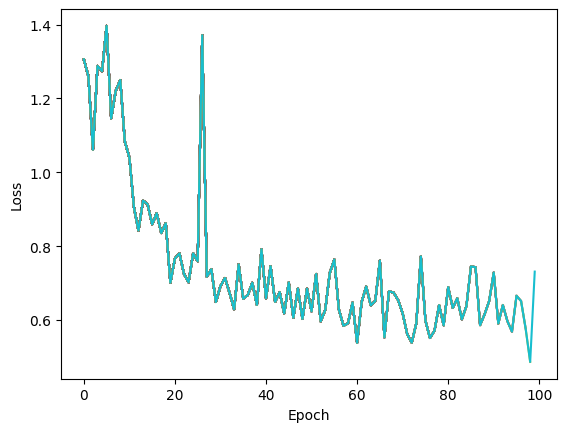

In [28]:
epochs = 100
losses = []

for epoch in range(epochs):
    for data in dataloader:
        values, = data

        # Move to GPU
        values = values.to(device)

        optimizer.zero_grad()
        output = model(values)

        loss = loss_fn(output, values)

        loss.backward()
        optimizer.step()

    losses.append(loss.item())

    plot_loss(losses)
    print_loss(epoch, loss.item())
    # plot loss and output to g ./output/loss_plot.png

    # Print the loss every 20th epoch
    if (epoch + 1) % 50 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.7f}')
        save_model(model, epoch)


## Evaluating the model

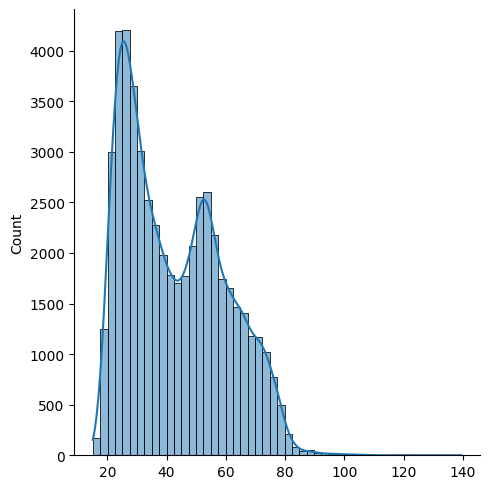

In [29]:
# Use the model to predict the training data and plot the loss
# Use this to set a threshold for anomaly detection

# Inspired by: https://github.com/curiousily/Getting-Things-Done-with-Pytorch/blob/master/manuscript/06.time-series-anomaly-ecg.md

def predict(model, dataset):
    predictions, losses = [], []
    criterion = torch.nn.L1Loss(reduction='sum').to(device)
    with torch.no_grad():
        model = model.eval()
        for seq_true in dataset:
            seq_true = seq_true.to(device)
            seq_pred = model(seq_true)

            loss = criterion(seq_pred, seq_true)

            predictions.append(seq_pred.cpu().numpy().flatten())
            losses.append(loss.item())
    return predictions, losses


_, losses = predict(model, train_data_normalized)

sns.displot(losses, bins=50, kde=True);

Correct normal predictions: 2412/2423


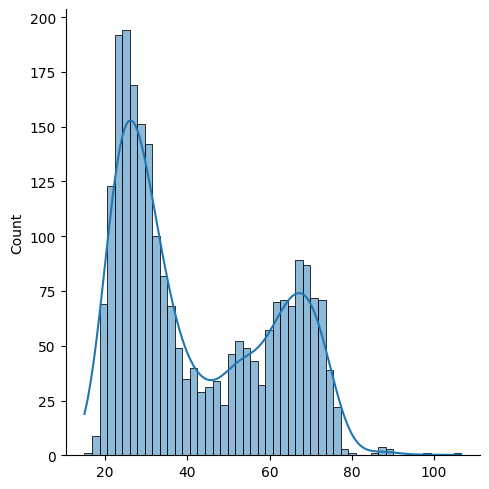

In [30]:
# Use the model to predict the test data using a threshold based on the training data
THRESHOLD = 80

predictions, pred_losses = predict(model, test_data_normalized)
sns.displot(pred_losses, bins=50, kde=True);

correct = sum(l <= THRESHOLD for l in pred_losses)
print(f'Correct normal predictions: {correct}/{len(test_data_normalized)}')

Correct anomaly predictions: 117/2014
Correct anomaly predictions: 51872/52344


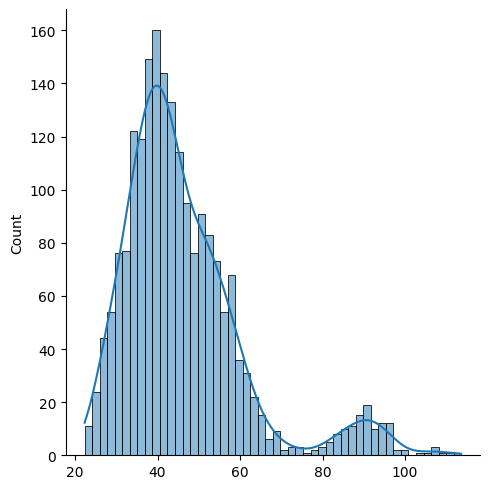

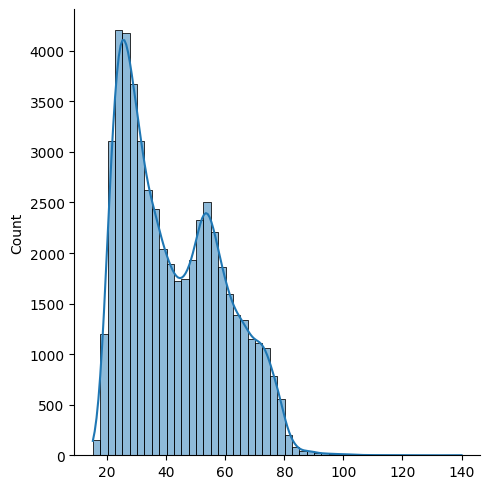

In [31]:
# Anamoly dataset
# 68;anomaly;2015-07-29 13:20:00;52063;2015-08-12 13:10:00;54076;Transformer failure

df_anomaly = pd.read_csv('../../data/care_to_compare/Wind Farm A/datasets/68.csv', delimiter=';')

anomaly_start_event_id = 52063
anomaly_end_event_id = 54076

anamoly_data = df_anomaly[(df_anomaly['id'] >= anomaly_start_event_id) & (df_anomaly['id'] <= anomaly_end_event_id)]
normal_data = df_anomaly[(df_anomaly['id'] < anomaly_start_event_id) | (df_anomaly['id'] > anomaly_end_event_id)]

anamoly_data = anamoly_data.drop(
    columns=['time_stamp', 'asset_id', 'id', 'train_test', 'status_type_id', 'sensor_1_avg', 'sensor_2_avg',
             'wind_speed_4_avg', 'sensor_5_avg', 'sensor_5_max', 'sensor_5_min', 'sensor_42_avg'])
normal_data = normal_data.drop(
    columns=['time_stamp', 'asset_id', 'id', 'train_test', 'status_type_id', 'sensor_1_avg', 'sensor_2_avg',
             'wind_speed_4_avg', 'sensor_5_avg', 'sensor_5_max', 'sensor_5_min', 'sensor_42_avg'])

anamoly_data_normalized = scaler.fit_transform(anamoly_data.values)
anamoly_data_normalized = torch.tensor(anamoly_data_normalized, dtype=torch.float32)

normal_data_normalized = scaler.fit_transform(normal_data.values)
normal_data_normalized = torch.tensor(normal_data_normalized, dtype=torch.float32)

an_predictions, an_pred_losses = predict(model, anamoly_data_normalized)
no_predictions, no_pred_losses = predict(model, normal_data_normalized)

sns.displot(an_pred_losses, bins=50, kde=True);
sns.displot(no_pred_losses, bins=50, kde=True);

correct = sum(l > THRESHOLD for l in an_pred_losses)
print(f'Correct anomaly predictions: {correct}/{len(anamoly_data_normalized)}')

correct = sum(l < THRESHOLD for l in no_pred_losses)
print(f'Correct anomaly predictions: {correct}/{len(normal_data_normalized)}')

Correct anomaly predictions: 130/1005
Correct anomaly predictions: 51614/52031


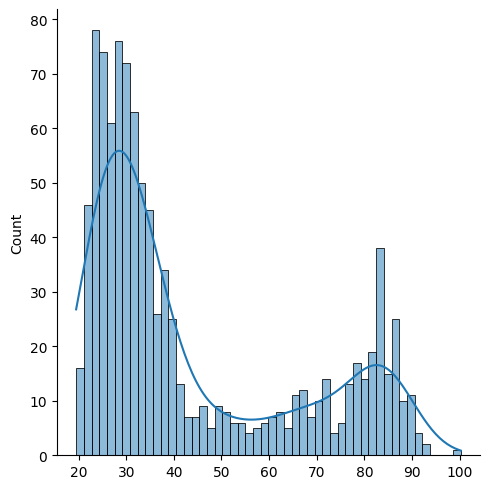

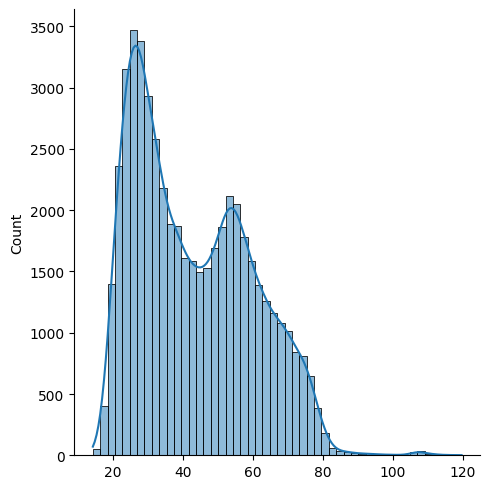

In [32]:
# Anamoly dataset
# 22;anomaly;2021-08-11 09:50:00;51888;2021-08-18 10:00:00;52892;Hydraulic group

df_anomaly = pd.read_csv('../../data/care_to_compare/Wind Farm A/datasets/22.csv', delimiter=';')

anomaly_start_event_id = 51888
anomaly_end_event_id = 52892

anamoly_data = df_anomaly[(df_anomaly['id'] >= anomaly_start_event_id) & (df_anomaly['id'] <= anomaly_end_event_id)]
normal_data = df_anomaly[(df_anomaly['id'] < anomaly_start_event_id) | (df_anomaly['id'] > anomaly_end_event_id)]

anamoly_data = anamoly_data.drop(
    columns=['time_stamp', 'asset_id', 'id', 'train_test', 'status_type_id', 'sensor_1_avg', 'sensor_2_avg',
             'wind_speed_4_avg', 'sensor_5_avg', 'sensor_5_max', 'sensor_5_min', 'sensor_42_avg'])
normal_data = normal_data.drop(
    columns=['time_stamp', 'asset_id', 'id', 'train_test', 'status_type_id', 'sensor_1_avg', 'sensor_2_avg',
             'wind_speed_4_avg', 'sensor_5_avg', 'sensor_5_max', 'sensor_5_min', 'sensor_42_avg'])

anamoly_data_normalized = scaler.fit_transform(anamoly_data.values)
anamoly_data_normalized = torch.tensor(anamoly_data_normalized, dtype=torch.float32)

normal_data_normalized = scaler.fit_transform(normal_data.values)
normal_data_normalized = torch.tensor(normal_data_normalized, dtype=torch.float32)

an_predictions, an_pred_losses = predict(model, anamoly_data_normalized)
no_predictions, no_pred_losses = predict(model, normal_data_normalized)

sns.displot(an_pred_losses, bins=50, kde=True);
sns.displot(no_pred_losses, bins=50, kde=True);

correct = sum(l > THRESHOLD for l in an_pred_losses)
print(f'Correct anomaly predictions: {correct}/{len(anamoly_data_normalized)}')

correct = sum(l < THRESHOLD for l in no_pred_losses)
print(f'Correct anomaly predictions: {correct}/{len(normal_data_normalized)}')

Correct anomaly predictions: 47/1009
Correct anomaly predictions: 52461/53073


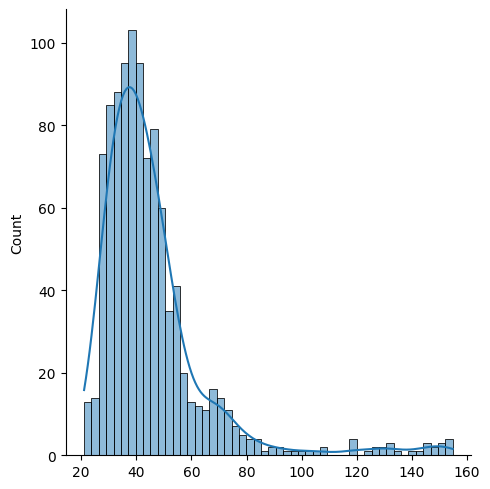

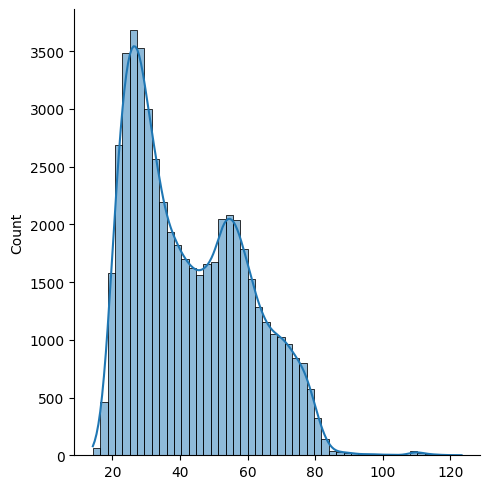

In [33]:
# Anamoly dataset
# 72;anomaly;2021-10-09 08:40:00;52497;2021-10-16 08:40:00;53505;Gearbox failure

df_anomaly = pd.read_csv('../../data/care_to_compare/Wind Farm A/datasets/72.csv', delimiter=';')

anomaly_start_event_id = 52497
anomaly_end_event_id = 53505

anamoly_data = df_anomaly[(df_anomaly['id'] >= anomaly_start_event_id) & (df_anomaly['id'] <= anomaly_end_event_id)]
normal_data = df_anomaly[(df_anomaly['id'] < anomaly_start_event_id) | (df_anomaly['id'] > anomaly_end_event_id)]

anamoly_data = anamoly_data.drop(
    columns=['time_stamp', 'asset_id', 'id', 'train_test', 'status_type_id', 'sensor_1_avg', 'sensor_2_avg',
             'wind_speed_4_avg', 'sensor_5_avg', 'sensor_5_max', 'sensor_5_min', 'sensor_42_avg'])
normal_data = normal_data.drop(
    columns=['time_stamp', 'asset_id', 'id', 'train_test', 'status_type_id', 'sensor_1_avg', 'sensor_2_avg',
             'wind_speed_4_avg', 'sensor_5_avg', 'sensor_5_max', 'sensor_5_min', 'sensor_42_avg'])

anamoly_data_normalized = scaler.fit_transform(anamoly_data.values)
anamoly_data_normalized = torch.tensor(anamoly_data_normalized, dtype=torch.float32)

normal_data_normalized = scaler.fit_transform(normal_data.values)
normal_data_normalized = torch.tensor(normal_data_normalized, dtype=torch.float32)

an_predictions, an_pred_losses = predict(model, anamoly_data_normalized)
no_predictions, no_pred_losses = predict(model, normal_data_normalized)

sns.displot(an_pred_losses, bins=50, kde=True);
sns.displot(no_pred_losses, bins=50, kde=True);

correct = sum(l > THRESHOLD for l in an_pred_losses)
print(f'Correct anomaly predictions: {correct}/{len(anamoly_data_normalized)}')

correct = sum(l < THRESHOLD for l in no_pred_losses)
print(f'Correct anomaly predictions: {correct}/{len(normal_data_normalized)}')